In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/mnt/Study/FreeCodeCampTasks/Page-View-Time-Series-Visualizer/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df=df[df['value']>=df['value'].quantile(0.025)]
df=df[df['value']<=df['value'].quantile(0.975)]

In [4]:
def draw_line_plot():
    fig, axis = plt.subplots()
    axis.plot(df.index, df['value'], color='red')
    axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    axis.set_xlabel('Date')
    axis.set_ylabel('Page Views')
    fig.savefig("/mnt/Study/FreeCodeCampTasks/Page-View-Time-Series-Visualizer/line_plot.png")
    return fig
draw_line_plot()    

AttributeError: 'RcParams' object has no attribute '_get'

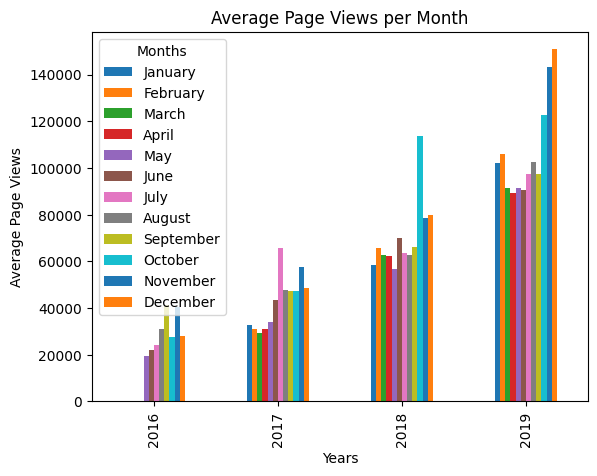

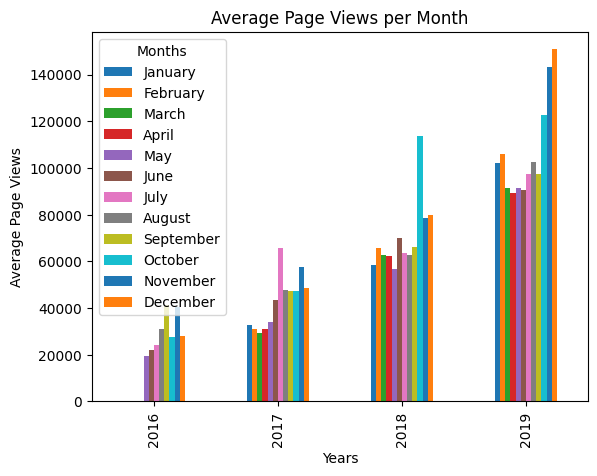

In [ ]:
def draw_bar_plot():
    draw =df.copy()
    draw['year'] = draw.index.year
    draw['month'] = draw.index.month
    draw = draw.groupby(['year', 'month'])['value'].mean().unstack()
    fig = draw.plot(kind='bar').get_figure()
    plt.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Page Views per Month')
    fig.savefig("/mnt/Study/FreeCodeCampTasks/Page-View-Time-Series-Visualizer/bar_plot.png")

    return fig
draw_bar_plot()

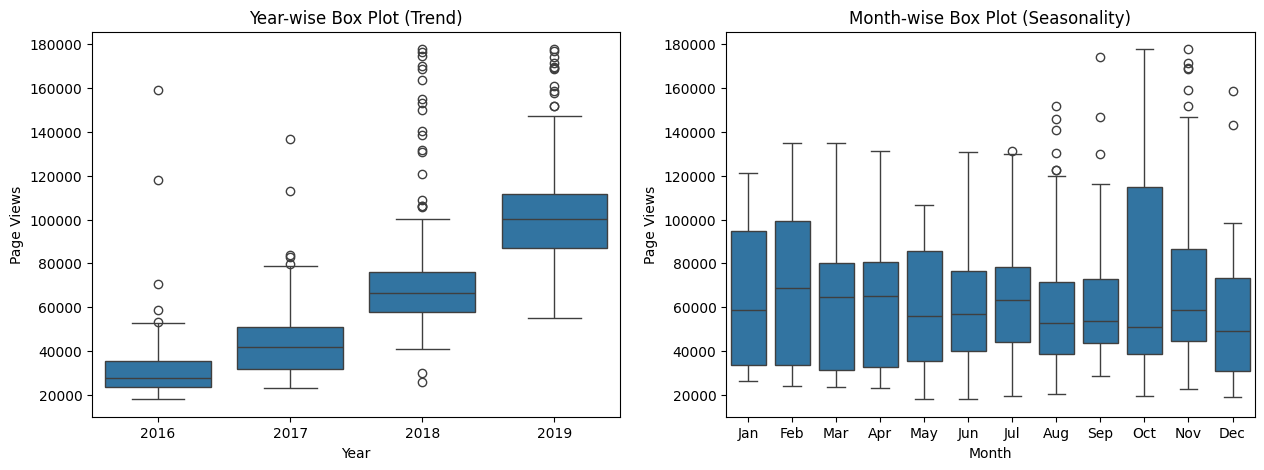

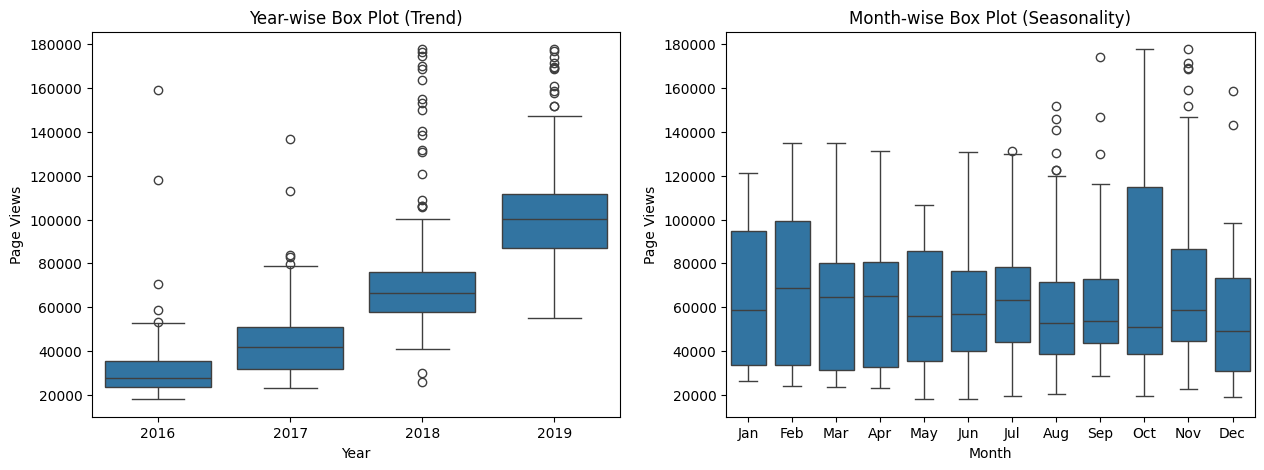

In [ ]:
def draw_box_plot():
    draw = df.copy()
    draw.reset_index(inplace=True)
    draw['year'] = draw['date'].dt.year
    draw['month'] = draw['date'].dt.strftime('%b')

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig,axis=plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(x='year', y='value', data=draw, ax=axis[0])
    axis[0].set_xlabel('Year')
    axis[0].set_ylabel('Page Views')
    axis[0].set_title('Year-wise Box Plot (Trend)')
    
    sns.boxplot(x='month', y='value', data=draw, order=month_order, ax=axis[1])
    axis[1].set_xlabel('Month')
    axis[1].set_ylabel('Page Views')
    axis[1].set_title('Month-wise Box Plot (Seasonality)')
    fig.savefig("/mnt/Study/FreeCodeCampTasks/Page-View-Time-Series-Visualizer/box_plot.png")

    return fig   
    
draw_box_plot()
